In [7]:
# Importing dependencies and reading the CSV files

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import csv
import seaborn as sns

#color scheme dictionary and preview
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
colors = ["Gold", "lightcoral", "lightskyblue"]
# sns.palplot(sns.color_palette(color_scheme.values()))
citydata = "generated_data/city_data.csv"
rides = "generated_data/ride_data.csv"

city_data = pd.read_csv(citydata)
ride_data = pd.read_csv(rides)

merged = pd.merge(city_data, ride_data,  how='left', on="city")
merged.head()




,city,driver_count,type,date,fare,ride_id
0,Tammyburgh,11,Urban,2017-01-02 10:56:28,12.40,7963408790849
1,Tammyburgh,11,Urban,2017-01-02 04:28:03,18.78,2315208159060
2,Tammyburgh,11,Urban,2017-01-03 03:00:08,30.10,558639764959
3,Tammyburgh,11,Urban,2017-01-01 00:10:21,7.76,9113511454178
4,Tammyburgh,11,Urban,2017-01-02 05:22:44,22.00,4171010688543


In [44]:
#finding max number of rides by city for validation
#max = merged["city"].value_counts().max()
#print(max)

# creating 3 data frames for plottting purpose
urbandf = merged[merged["type"]=="Urban"]
surbandf = merged[merged["type"]=="Suburban"]
Ruraldf = merged[merged["type"]=="Rural"]



In [9]:
#average fare per city
UrbanAvfare = urbandf.groupby(['city']).mean()['fare']
SUbrbanAvfare = surbandf.groupby(['city']).mean()['fare']
RurrbanAvfare = Ruraldf.groupby(['city']).mean()['fare']
#print(SUbrbanAvfare)




In [51]:
# Total Drivers per city
totdriversU = urbandf.groupby("city")["driver_count"].mean()
totdriversS = surbandf.groupby("city")["driver_count"].mean()
totdriversR = Ruraldf.groupby("city")["driver_count"].mean()
print(totdriversR)

city
Campbellmouth          2
Davidsonfurt           1
Hoganfort              5
Joshuaview             1
Lake Joshuaburgh       8
Nguyenshire            3
North Paulshire        8
Port Darrellhaven     10
Port Jameston          2
Port Kenneth           1
Richardsonborough      9
Sheltonhaven           1
Smithville             8
South Angela           9
South Brittany         9
South Jacobside        7
South Samanthafurt     8
South Stephen          6
Name: driver_count, dtype: int64


In [11]:
# Total Drivers per city
totdriversU = urbandf.groupby("city")["driver_count"].mean()
totdriversS = surbandf.groupby("city")["driver_count"].mean()
totdriversR = Ruraldf.groupby("city")["driver_count"].mean()
#print(totdriversR)

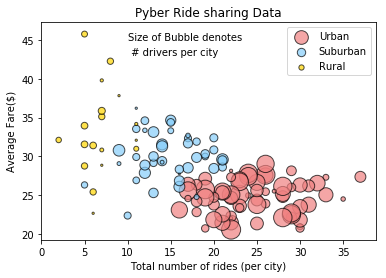

In [49]:
# create a scatter plot amplifying the marker to show better
plt.scatter(totridesU, UrbanAvfare , s= totdriversU*5 , c='#F08080', alpha=.7, edgecolor="black", marker="o", label="Urban")
plt.scatter(totridesS, SUbrbanAvfare , s= totdriversS*5 , c='#87CEFA', alpha=.7, edgecolor="black", marker="o", label="Suburban")
plt.scatter(totridesR, RurrbanAvfare , s= totdriversR*5 , c='#FFD700', alpha=.7, edgecolor="black", marker="o", label="Rural")
plt.title("Pyber Ride sharing Data")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare($)")
plt.text(10, 45,"Size of Bubble denotes ", fontsize=10)
plt.text(10, 43," # drivers per city", fontsize=10)
plt.legend()
sns.set
plt.show()

type
Rural        4271.69
Suburban    18779.26
Urban       40093.25
Name: fare, dtype: float64


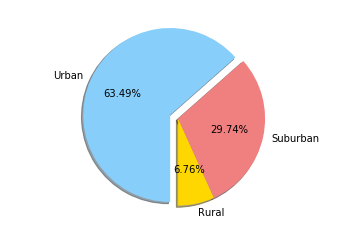

In [48]:
#df["Clo name"]= Array name

#  % of total fares by City Type


Tot_fare_pie = merged.groupby(["type"])["fare"].sum()

print(Tot_fare_pie)
Tot_fare_pie.index
# creating Pie


explode = (0,0, 0.1)

colors = ["Gold", "lightcoral", "lightskyblue"]
#sizes = [Tot_fare_pie]
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.legend(loc = "upper right")

plt.pie(Tot_fare_pie, labels = Tot_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
# Prints our pie chart to the screen
plt.show()

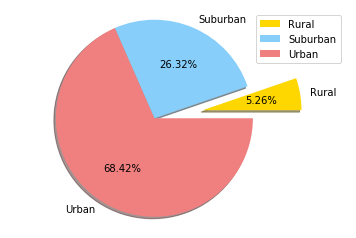

In [30]:
#Total rides by city type.

Totrides_pie = merged.groupby(["type"])["ride_id"].count()
Totrides_pie
#Use the City Pie index for wedge labels.
Totrides_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the first section of the pie chart.
explode = (0.5,0,0)

#Create the pie chart.
plt.pie(Totrides_pie, labels = Totrides_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

#Tell Matplotlib that we wnat the pie chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the chart.
plt.show()

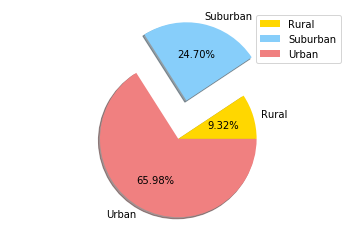

In [42]:
#Total drivers by city type.

Totdrivers_pie = merged.groupby(["type"])["driver_count"].mean()
Totdrivers_pie
#Use the City Pie index for wedge labels.
Totdrivers_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the first section of the pie chart.
explode = (0,0.5,0)

#Create the pie chart.
plt.pie(Totdrivers_pie, labels = Totdrivers_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

#Tell Matplotlib that we wnat the pie chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the chart.
plt.show()